# Module 7 - Simple Harmonic Oscillators

<img src="http://i.imgur.com/l2WMuTN.gif">

## Goals

- Numerically solve the simple harmonic pendulum
- Euler-Cromer and Verlet methods

## Equation of Motion

The equation of motion for a simple linear pendulum of length $\ell$ and mass $m$ is given by:

$$ m \frac{d \vec{v}}{d t} = \vec{F}_{\rm g} = -m g \hat{y}$$

Measuring $x$ and $y$ from the equlibrium position we have 
\begin{align}
x &= \ell \sin \theta \\
y &= \ell (1-\cos\theta)
\end{align}

The kinetic and potential energy are:

\begin{align}
T &= \frac{1}{2} m \dot{r}^2 \\
&= \frac{1}{2} m (\dot{x}^2 + \dot{y}^2) \\
&= \frac{1}{2} m \ell^2 \dot{\theta}^2
\end{align}

\begin{equation}
V = m g \ell (1-\cos\theta).
\end{equation}

Thus, the Lagrangian is:
\begin{align}
\mathcal{L} &= T - V \\
&= \frac{1}{2} m \ell^2 \dot{\theta}^2 - m g \ell (1-\cos\theta) 
\end{align}
and the equation of motion is given by the Euler-Lagrange formula

\begin{align}
\frac{\partial \mathcal{L}}{\partial \theta} - \frac{d}{dt} \frac{\partial \mathcal{L}}{\partial \dot{\theta}} &= 0 \\
-m g \ell \sin \theta - \frac{d}{dt} (m\ell^2 \dot{\theta}) &= 0
\end{align}

which yields the familiar equation:
\begin{equation}
\ddot{\theta} = -\frac{g}{\ell} \sin\theta .
\end{equation}

In the small angle approximation, $\sin \theta \approx \theta$ for $\theta \ll 1$, we can simplify the differential equation as 

\begin{equation}
\ddot{\theta} = -\frac{g}{\ell} \theta ,
\end{equation}

which can be it can be integrated to give

$$ \theta(t) = \theta_0 \cos \left( \sqrt{\frac{g}{\ell}} t \right).$$

For $\theta(0) = \theta_0 \ll 1$ and $\dot{\theta}(0) = 0$ .


<div class="span alert alert-success">
<h2> Programming challenge </h2>
<br/>
Create a function that uses the Euler method to directly integrate the small angle approximation equation of motion

\begin{equation}
\ddot{\theta} = -\frac{g}{\ell} \theta ,
\end{equation}

and compare with the analytical expression for $\theta_0 = \pi/12$ and $\dot{\theta}(0) =0$ for $\ell = 0.25$ m. Start by writing the second order differential equation 
<br/>
<br/>
\begin{equation}
\frac{d^2 f(t)}{dt^2} = g(f,t)
\end{equation}

as two coupled first order ODEs:
<br/>
<br/>
\begin{align}
\frac{d f'(t)}{dt} &= g(f,t)\\
\\
\frac{df(t)}{dt} &= f'(t)
\end{align}
<br/>
You can then write these equations in discrete form using de forward derivative and Euler's method:

\begin{equation}
f_{n+1} = f_n + g(f_n,t_n).
\end{equation}

</div>

<IPython.core.display.Javascript object>


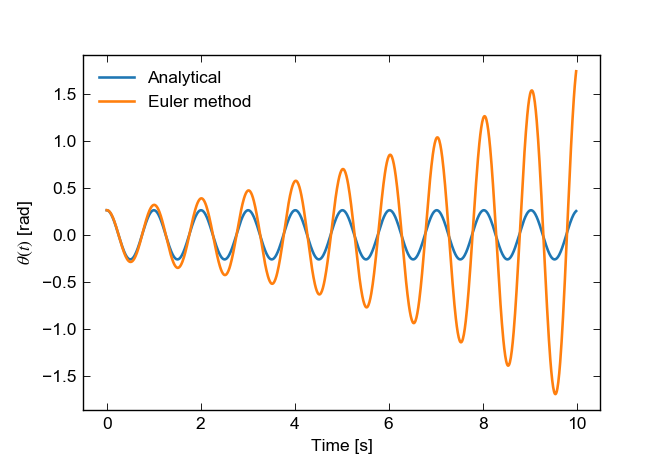

<IPython.core.display.Javascript object>


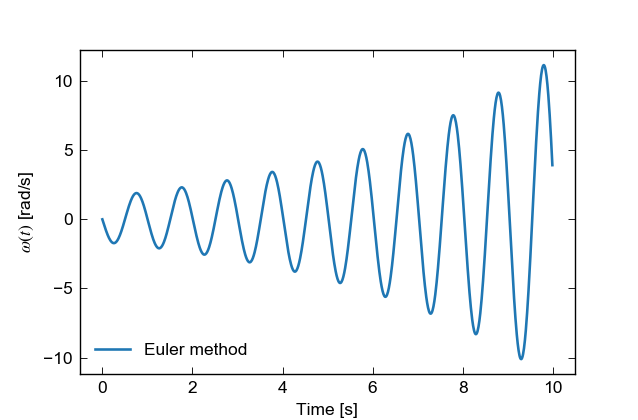

In [1]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib notebook
from scipy.constants import pi,g

def Euler(theta0, l, tmax, dt):
    t = np.arange(0.0, tmax, dt)
    theta = np.zeros_like(t)
    omega = np.zeros_like(t)
    theta[0] = theta0
    
    for n in range(t.size-1):
        theta[n+1] = theta[n] + omega[n]*dt
        omega[n+1] = omega[n] -(g/l)*theta[n]*dt
    
    return t,theta,omega

# constants and intitial conditions
l = 0.25 # m
dt = 0.01 # s
tmax = 10 # s
theta0 = pi/12.0 # radians

t,theta,omega = Euler(theta0, l, tmax, dt)

plt.figure()
# Small angle solution
plt.plot(t, theta[0]*np.cos(np.sqrt(g/l)*t), label='Analytical')
plt.plot(t, theta, label='Euler method')
plt.xlabel('Time [s]')
plt.ylabel(r'$\theta(t)$ [rad]')
plt.legend()

# Angular frequency
plt.figure()
plt.plot(t, omega, label='Euler method')
plt.legend(loc='lower left')
plt.xlabel('Time [s]')
plt.ylabel(r'$\omega(t)$ [rad/s]')

## What went wrong?

The oscillations are **growing** with time!  This is our first encounter with a numerical procedure that is **unstable**.  

Let's examine the total energy of the system where we can approximate $\cos\theta \simeq 1 - \theta^2/2$:

\begin{align}
E &= \frac{1}{2} m \ell^2 \omega^2 + m g \ell (1-\cos\theta) \\
&\simeq \frac{1}{2}m \ell^2 \left(\omega^2 + \frac{g}{\ell}\theta^2 \right).
\end{align}

Writing things in terms of our Euler variables:

\begin{align}
E_{n+1} &= \frac{1}{2}m\ell^2 \left[\left(\omega_n - \frac{g}{\ell}\theta_n \Delta t\right)^2 + \frac{g}{\ell}\left(\theta_n + \omega_n\Delta t\right)^2 \right] \\
&= E_{n} + \frac{1}{2}mg \ell \left(\omega_n^2 + \frac{g}{\ell} \theta_n^2\right) \Delta t^2.
\end{align}

This tells us the origin of the problem: **the energy is increasing without bound, regardless of the size of $\Delta t$**.

<div class="span alert alert-success">
<h2> Programming challenge </h2>
<br/>
Create a function that computes the energy of the pendulum over time given the numerical solutions for $\theta$ and $\omega$.
</div>

<IPython.core.display.Javascript object>


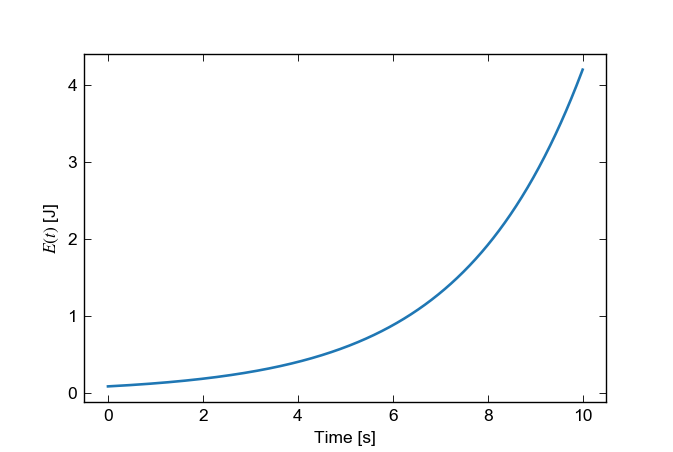

In [2]:
def energy(theta, omega, l):
    return 0.5*l**2*(omega**2 + g*theta**2/l)

plt.figure()
plt.plot(t, energy(theta, omega, l), label='Small angle solution')
plt.xlabel('Time [s]')
plt.ylabel(r'$E(t)$ [J]')

## A simple fix - Euler-Cromer method
Looking at our original discretized equations:

\begin{align}
\theta_{n+1} &= \theta_n + \omega_n \Delta t \\
\omega_{n+1} &= \omega_n - \frac{g}{\ell} \theta_n \Delta t
\end{align}

we can make the simple observation that we can replace the order of evaluation and use the updated value of $\omega$ in our calculation of $\theta$:

\begin{align}
\omega_{n+1} &= \omega_n - \frac{g}{\ell} \theta_n \Delta t \\
\theta_{n+1} &= \theta_n + \omega_{n+1} \Delta t
\end{align}

We can use these updated equations to estimate the energy of the system at each step:

\begin{align}
E_{n+1} &= \frac{1}{2}m\ell^2 \left[\left(\omega_n - \frac{g}{\ell}\theta_n \Delta t\right)^2 + \frac{g}{\ell}\left(\theta_n + \omega_n\Delta t -\frac{g}{\ell}\theta_n\Delta t^2\right)^2 \right] \\
E_{n+1} &= \frac{1}{2}m\ell^2 \left[\frac{g}{\ell}\omega_n^2\Delta t^2 - \left(\frac{g}{\ell}\right)^2\theta_n^2 \Delta t^2 - 2 \left(\frac{g}{\ell}\right)^2\theta_n \omega_n\Delta t^3 + \left(\frac{g}{\ell}\right)^3 \theta_n^2 \Delta t^4\right].
\end{align}

Ignoring the third and fourth order $\Delta t$ terms, this leads to the energy being *approximately* conserved at each step:

\begin{equation}
E_{n+1} = E_{n} + \frac{1}{2}mg\ell  \left(\omega_n^2 - \frac{g}{\ell}\theta_n^2 \right)\Delta t^2 + \mathrm{O}(\Delta t^3).
\end{equation}
<div class="span alert alert-success">
<h2> Programming challenge </h2>
<br/>
Define a new function that uses the Euler-Cromer method to more accurately integrate the equations of motion for the small angle approximation. Compare the numerical solution to the analytical result.
</div>

<IPython.core.display.Javascript object>


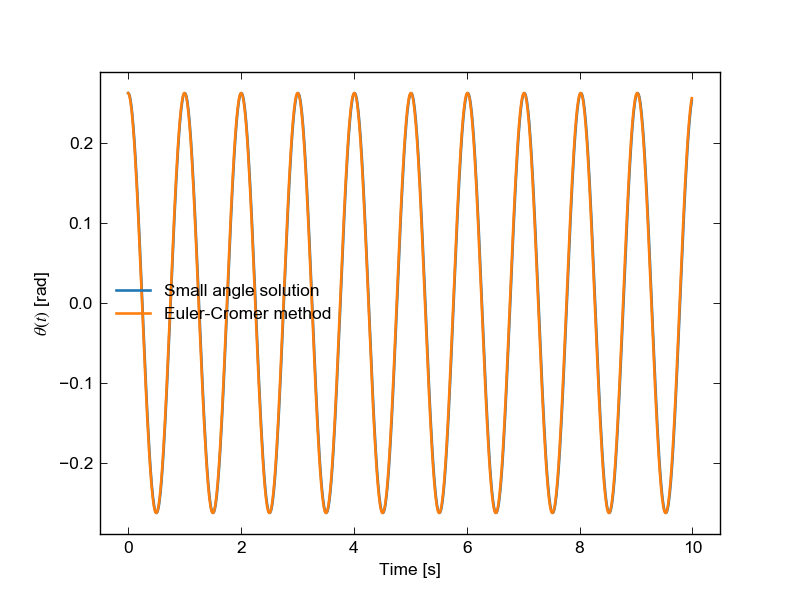

<IPython.core.display.Javascript object>


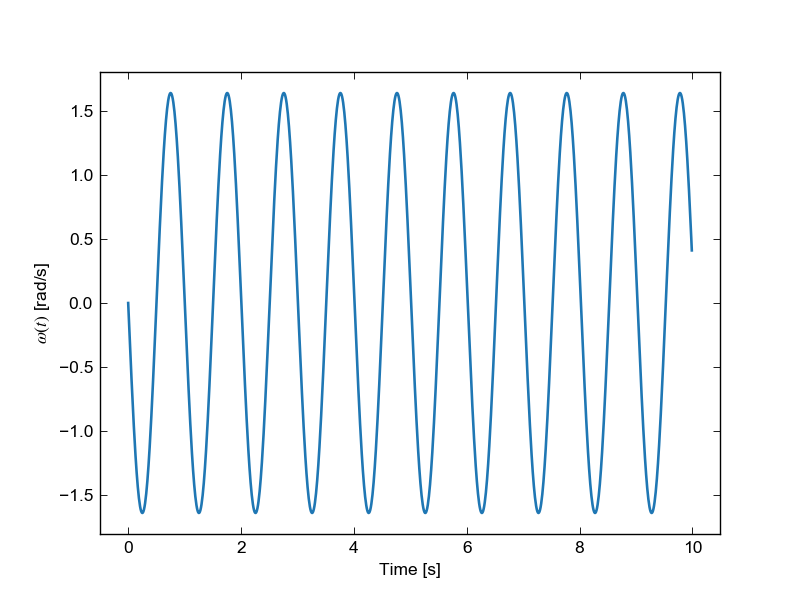

<IPython.core.display.Javascript object>


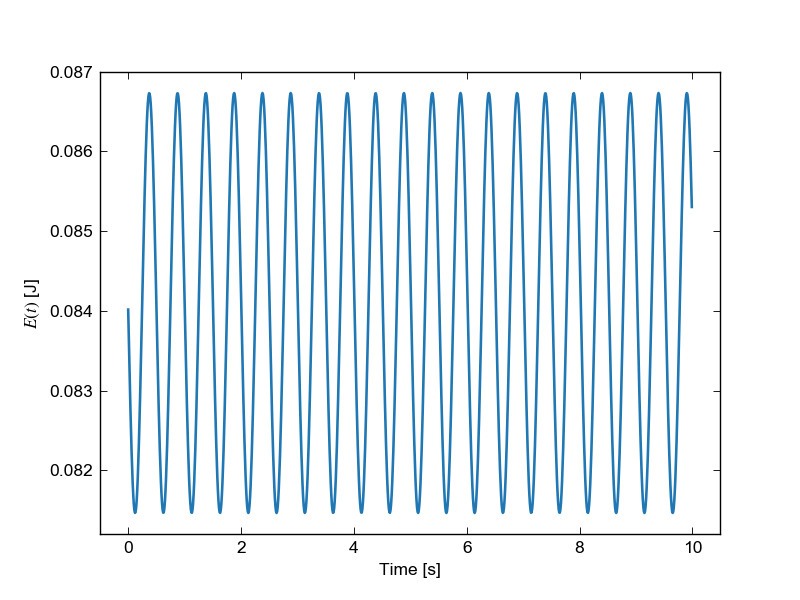

In [4]:

def Euler_Cromer(theta0, l, tmax, dt):
    t = np.arange(0.0, tmax, dt)
    theta = np.zeros_like(t)
    omega = np.zeros_like(t)
    theta[0] = theta0
    
    for n in range(t.size-1):
        omega[n+1] = omega[n] -(g/l)*theta[n]*dt
        theta[n+1] = theta[n] + omega[n+1]*dt

    return t,theta,omega

# constants and intitial conditions
l = 0.25 # m
dt = 0.01 # s
tmax = 10 # s
theta0 = pi/12.0 # radians

t,theta,omega = Euler_Cromer(theta0, l, tmax, dt)
    
plt.figure()
# the small angle solution
plt.plot(t, theta[0]*np.cos(np.sqrt(g/l)*t), label='Small angle solution')
plt.plot(t, theta, label='Euler-Cromer method')
plt.legend(loc='lower left')
plt.xlabel('Time [s]')
plt.ylabel(r'$\theta(t)$ [rad]')
plt.legend()

plt.figure()
plt.plot(t, omega, label='Small angle solution')
plt.xlabel('Time [s]')
plt.ylabel(r'$\omega(t)$ [rad/s]')

plt.figure()
plt.plot(t, energy(theta, omega, l), label='Small angle solution')
plt.xlabel('Time [s]')
plt.ylabel(r'$E(t)$ [J]')
#plt.ylim(0.081,0.087)

The energy of the pendulum now oscillates around a constant value.

## An alternative fix - the Verlet method
So far, we have solved simple second order differential equations of the form

\begin{equation}
    \frac{d^2 f(t}{dt^2} = g(f,t)
\end{equation}

by converting them into two first order equations

\begin{align}
    \frac{df}{dt} &= \dot{f} \\
    \frac{d\dot{f}}{dt} &= g(f,t).
\end{align}

However, we can use other methods to directly solve the second order differential equation. One such method is known as Verlet (first described in application to molecular dynamics). In the Verlet method we start by combining two Taylor expansions of our function (forward and backwards in time)

\begin{align}
    f(t + \Delta t) &= f(t) + \frac{df}{dt}\Delta t + \frac{1}{2}\frac{d^2f}{dt^2}(\Delta t)^2 + \frac{1}{6}\frac{d^3f}{dt^3}(\Delta t)^3 + \dots \\
    f(t - \Delta t) &= f(t) - \frac{df}{dt}\Delta t + \frac{1}{2}\frac{d^2f}{dt^2}(\Delta t)^2 - \frac{1}{6}\frac{d^3f}{dt^3}(\Delta t)^3 + \dots
\end{align}

By combining theses two expansions, we can cancel out the first and third order terms to obtain an expression for $f(t + \Delta t)$ based on the values of two previous time steps

\begin{equation}
    f(t + \Delta t) \approx 2f(t) - f(t - \Delta t) + \frac{d^2f}{dt^2}(\Delta t)^2
\end{equation}

with an overall error of order $O([\Delta t]^4)$.

The equation above in discrete form becomes

\begin{equation}
    f_{n+1} = 2f_n - f_{n-1} + g(f_n,t_n)(\Delta t)^2.
\end{equation}

Notice that for this method we do not need to compute the first order derivative to iteratively find the subsequent solutions. While this method does not directly return the first derivative of our function (i.e., $\dot{f} = df/dt$), one can readily use the central difference to calculate this quantity

\begin{equation}
    \dot{f}_{n} = (f_{n+1} - f_{n-1})/(2\Delta t)
\end{equation}

with an overall error of order $O([\Delta t]^2)$.

One minor problem with the Verlet method is that it is not self-starting because we need two previous time points to calculate the current value. We can overcome this by computing the values for the first iteration using the Euler-Cromer method

\begin{align}
     \dot{f}_1 &= \dot{f}_0 + g(f_0, t_0) \Delta t \\
     f_1 &= f_0 + \dot{f}_1 \Delta t.
\end{align}

<div class="span alert alert-success">
<h2> Programming challenge </h2>
<br/>
Define a function that uses the Verlet method to more accurately integrate the equations of motion for the small angle approximation. In order to use Verlet's method, you will need to calculate the first time step using the Euler-Cromer method. Compare the numerical solution from the Verlet method to the Euler-Cromer method and the analytical result.
</div>

<IPython.core.display.Javascript object>


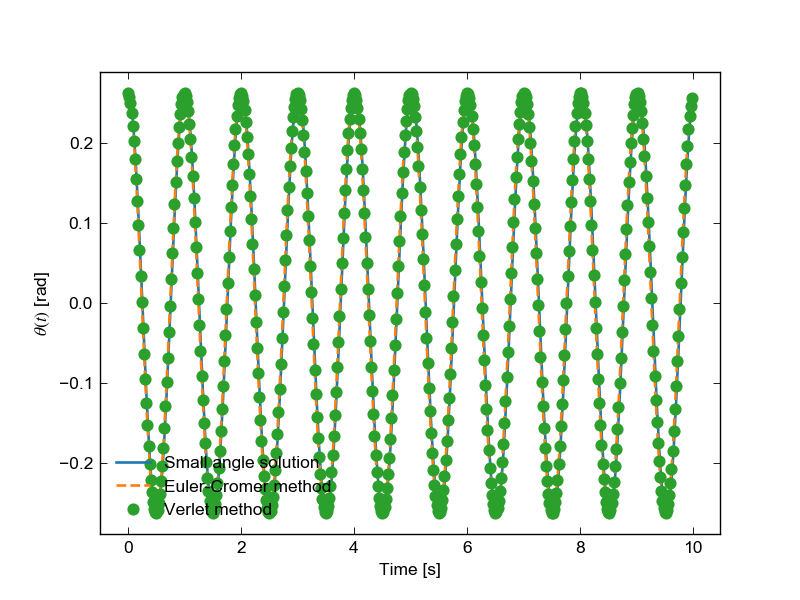

<IPython.core.display.Javascript object>


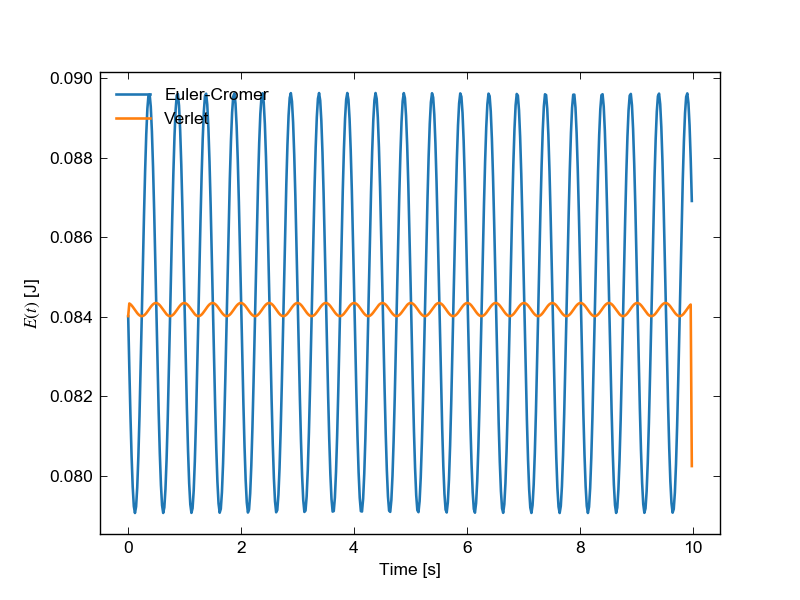

In [5]:
def Verlet(theta0, l, tmax, dt):
    t = np.arange(0.0, tmax, dt)
    theta = np.zeros_like(t)
    omega = np.zeros_like(t)
    theta[0] = theta0
    
    # Use Euler-Cromer method to find the solution for the first time step
    omega[1] = omega[0] -(g/l)*theta[0]*dt
    theta[1] = theta[0] + omega[1]*dt

    # Use Verlet method to solve our equations from step 2 on
    for n in range(1,t.size-1):
        theta[n+1] = 2*theta[n] - theta[n-1] - (g/l)*theta[n]*dt**2
        omega[n] = (theta[n+1] - theta[n-1])/(2.0*dt)
        
    return t,theta,omega

# constants and intitial conditions
l = 0.25 # m
dt = 0.02 # s
tmax = 10 # s
theta0 = pi/12.0 # radians

t,thetaEC,omegaEC = Euler_Cromer(theta0, l, tmax, dt)
t,thetaV,omegaV = Verlet(theta0, l, tmax, dt)

plt.figure()
# the small angle solution
plt.plot(t, theta[0]*np.cos(np.sqrt(g/l)*t), label='Small angle solution')
plt.plot(t, thetaEC,ls='--', label='Euler-Cromer method')
plt.plot(t, thetaV,"o", label='Verlet method')
plt.legend(loc='lower left')
plt.xlabel('Time [s]')
plt.ylabel(r'$\theta(t)$ [rad]')

# System energy
plt.figure()
plt.plot(t, energy(thetaEC, omegaEC, l), label='Euler-Cromer')
plt.plot(t, energy(thetaV, omegaV, l), label='Verlet')
plt.legend()
plt.xlabel('Time [s]')
plt.ylabel(r'$E(t)$ [J]')
#plt.ylim(0.081,0.087)

Energy is much better conserved when using the Verlet algorithm vs. Euler-Cromer for the same $\Delta t$.